In [1]:
## packages

import librosa
import sklearn

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

import os

import numpy as np
import pandas as pd

In [2]:
## testing with a file

audio_path = r'tracks\pop\pop.00000.wav'
x , sr = librosa.load(audio_path)
print(type(x), type(sr))

print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(661504,) 22050


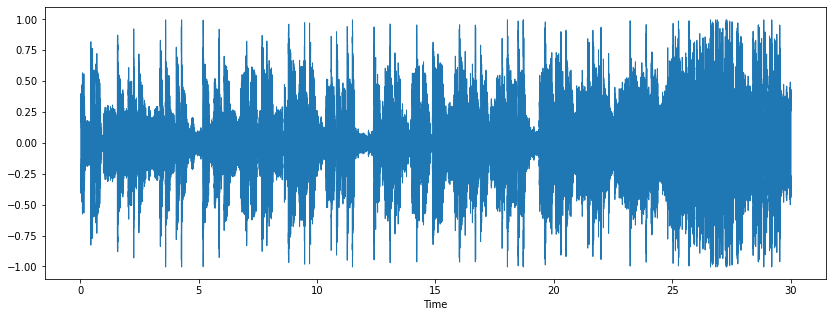

In [3]:
## ploting the file in waveform

plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

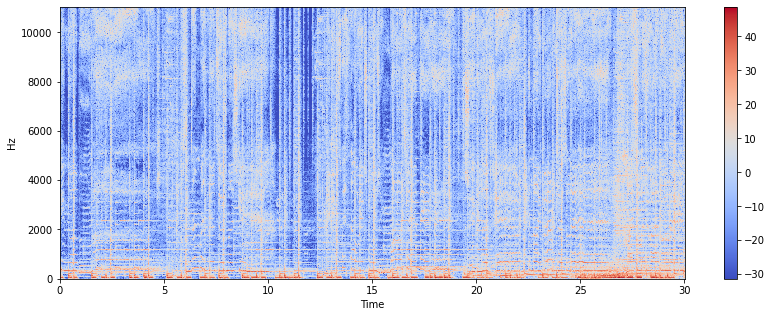

In [4]:
## converting the song into image using Spectrogram

X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

### Feature Extraction

15


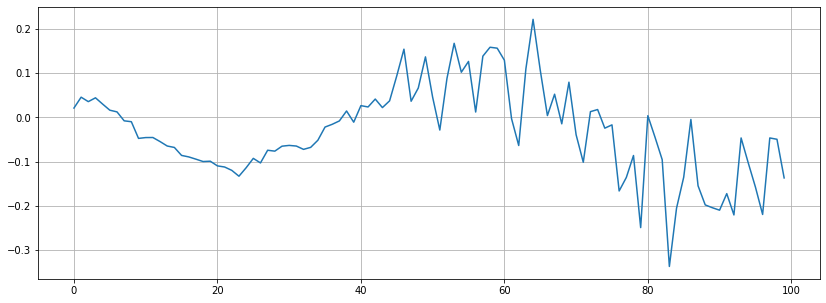

In [5]:


n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

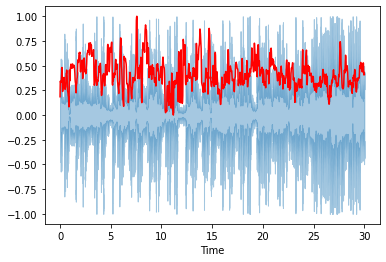

In [6]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

In [7]:
## include if all the genre is needed
# genre = os.listdir(r'tracks')
# print(genre)

genre = ['hiphop', 'pop']

In [8]:
## feature extraction funciton

def normalize(x, axis=0):
        return sklearn.preprocessing.minmax_scale(x, axis=axis)

def zero_cross(x):
    n0 = 9000
    n1 = 9100
    zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
    return sum(zero_crossings)

def spec_center(x, sr):
    spectral_centroids = normalize(librosa.feature.spectral_centroid(x, sr=sr)[0])
    frames = range(len(spectral_centroids))
    t = librosa.frames_to_time(frames)
    ma = max(spectral_centroids)
    return t[np.where(spectral_centroids==ma)[0][0]]

In [9]:
li = []

for gen in genre:
    for song in os.listdir(os.path.join('tracks', gen)):
        x, sr = librosa.load(os.path.join('tracks', gen, song))
        li.append([zero_cross(x), round(spec_center(x, sr), 2), gen])

In [10]:
li = np.array(li)

In [11]:
# optional if needed to store it as csv

np.savetxt("data.csv", li, delimiter=", ", fmt="% s")

import pandas as pd
data = pd.read_csv("data.csv")

### Implementing svm

In [12]:
X = li[:, 0:2]
y = li[:,2]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [14]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(X_train,y_train)

SVC(random_state=1)

In [15]:
y_pred = classifier.predict(X_test)

In [16]:
sklearn.metrics.confusion_matrix(y_test, y_pred)

array([[10, 13],
       [ 5, 12]], dtype=int64)

In [21]:
## testing for custom song

path = 'E:\class\rec-lab\ml\mini_pro\tracks\pop\pop.00009.wav'
x, sr = librosa.load(os.path.join('tracks', gen, song))
print(classifier.predict(np.array([[zero_cross(x), round(spec_center(x, sr), 2)]])))

['hiphop']


In [18]:
## finding the best pair with more accuracy
from itertools import combinations
from sklearn.metrics import accuracy_score

def accuracy(genre):
    li = []
    for gen in genre:
        for song in os.listdir(os.path.join('tracks', gen)):
            x, sr = librosa.load(os.path.join('tracks', gen, song))
            li.append([zero_cross(x), round(spec_center(x, sr), 2), gen])
    li = np.array(li)
    X = li[:, 0:2]
    y = li[:,2]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
    classifier = SVC(kernel='rbf', random_state = 1)
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    return round(accuracy_score(y_test, y_pred), 2)

ge = ['blues', 'metal']
print(f"{ge[0]} vs {ge[1]} accu: {accuracy(ge)}")

blues vs metal accu: 0.78
